#MDP Deterministic policy

In [24]:
import numpy as np

# Transition matrices
T_a0 = np.array([[0.5, 0.5, 0], [0.5, 0.5, 0], [0.5, 0.5, 0]])
T_a1 = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])

# Reward matrices
R_a0 = np.array([[1, 1, 0], [2, 0, 0], [1, 1, 0]])
R_a1 = np.array([[0, 0, 1], [0, 0, 2], [0, 0, -1]])

# Discount factor
gamma = 0.9

# Epsilon for epsilon-greedy policy
epsilon = 0.1

# Initialize policy randomly
policy = np.random.choice([0, 1], size=(3,))
initial_policy = np.copy(policy)
def calculate_value_function(policy):
    # Initialize value function
    V = np.zeros(3)
    while True:
        old_V = np.copy(V)
        for state in range(3):
            action_values = np.zeros(2)
            action_values[0] = sum([T_a0[state][s] * (R_a0[state][s] + gamma * old_V[s]) for s in range(3)])
            action_values[1] = sum([T_a1[state][s] * (R_a1[state][s] + gamma * old_V[s]) for s in range(3)])
            V[state] = ((1-epsilon) * action_values[policy[state]]) + (epsilon * action_values[1-policy[state]])
        if np.max(np.abs(old_V - V)) < 1e-5:
            break
    return V

def policy_improvement(policy):
    while True:
        old_policy = np.copy(policy)
        V = calculate_value_function(policy)
        for state in range(3):
            action_values = np.zeros(2)
            action_values[0] = sum([T_a0[state][s] * (R_a0[state][s] + gamma * V[s]) for s in range(3)])
            action_values[1] = sum([T_a1[state][s] * (R_a1[state][s] + gamma * V[s]) for s in range(3)])
            policy[state] = np.argmax(action_values)
        if np.array_equal(old_policy, policy):
            break
    return policy

print("Initial Policy:", initial_policy)
optimal_policy = policy_improvement(policy)
print("Optimal Policy:", optimal_policy)

Initial Policy: [1 0 0]
Optimal Policy: [0 1 0]


Value function covnvegence

Initial Policy: [0 0 0]
Optimal Policy: [0 1 0]


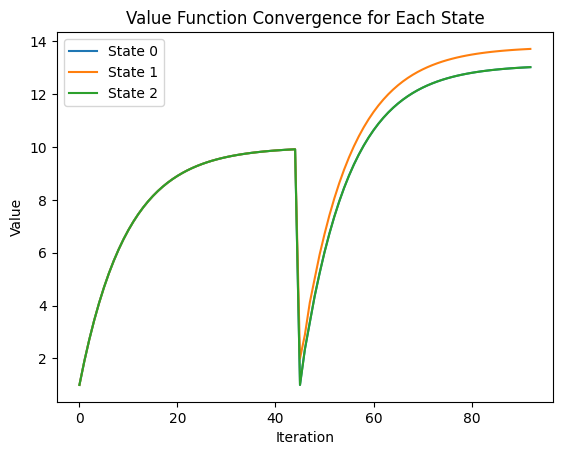

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrices
T_a0 = np.array([[0.5, 0.5, 0], [0.5, 0.5, 0], [0.5, 0.5, 0]])
T_a1 = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])

# Reward matrices
R_a0 = np.array([[1, 1, 0], [2, 0, 0], [1, 1, 0]])
R_a1 = np.array([[0, 0, 1], [0, 0, 2], [0, 0, -1]])

# Discount factor
gamma = 0.9

# Initialize policy randomly
policy = np.array([0,0,0])

# Initialize an empty list to hold value function history for each state
V_history = {0: [], 1: [], 2: []}

def calculate_value_function(policy):
    # Initialize value function
    V = np.zeros(3)
    while True:
        old_V = np.copy(V)
        for state in range(3):
            action_values = np.zeros(2)
            action_values[0] = sum([T_a0[state][s] * (R_a0[state][s] + gamma * old_V[s]) for s in range(3)])
            action_values[1] = sum([T_a1[state][s] * (R_a1[state][s] + gamma * old_V[s]) for s in range(3)])
            V[state] = action_values[policy[state]]
            V_history[state].append(V[state])  # add current state value to history
        if np.max(np.abs(old_V - V)) < 1e-2:
            break
    return V

def policy_improvement(policy):
    while True:
        old_policy = np.copy(policy)
        V = calculate_value_function(policy)
        for state in range(3):
            action_values = np.zeros(2)
            action_values[0] = sum([T_a0[state][s] * (R_a0[state][s] + gamma * V[s]) for s in range(3)])
            action_values[1] = sum([T_a1[state][s] * (R_a1[state][s] + gamma * V[s]) for s in range(3)])
            policy[state] = np.argmax(action_values)
        if np.array_equal(old_policy, policy):
            break
    return policy

print("Initial Policy:", policy)
optimal_policy = policy_improvement(policy)
print("Optimal Policy:", optimal_policy)

# Plotting
for state in range(3):
    plt.plot(V_history[state], label=f'State {state}')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Value Function Convergence for Each State')
plt.legend()
plt.show()


Simulations

Optimal Policy: [0 1 0]
Optimal Policy Total Score: 13306
Policy [0, 0, 0] Total Score: 10011
Policy [0, 0, 1] Total Score: 4969
Policy [0, 1, 1] Total Score: -9675
Policy [1, 0, 0] Total Score: 10005
Policy [1, 0, 1] Total Score: -9697
Policy [1, 1, 0] Total Score: 12455
Policy [1, 1, 1] Total Score: -9844


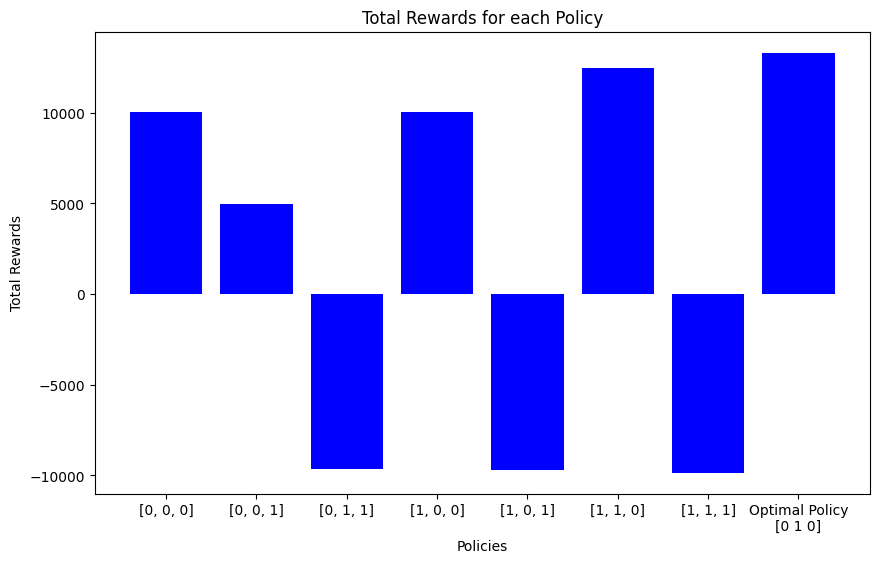

In [30]:
def simulate(policy, num_episodes=100, max_steps=100):
    total_rewards = 0
    for _ in range(num_episodes):
        state = np.random.choice([0, 1, 2])  # Start with a random state
        for _ in range(max_steps):
            action = policy[state]
            if action == 0:
                next_state = np.random.choice([0, 1, 2], p=T_a0[state])
                reward = R_a0[state][next_state]
            else:  # action == 1
                next_state = np.random.choice([0, 1, 2], p=T_a1[state])
                reward = R_a1[state][next_state]
            total_rewards += reward
            state = next_state
    return total_rewards

# Optimize policy
optimal_policy = policy_improvement(policy)
print("Optimal Policy:", optimal_policy)

# Test optimal policy
optimal_policy_score = simulate(optimal_policy)
print("Optimal Policy Total Score:", optimal_policy_score)

# List of test policies
test_policies = [
    [0,0,0],
    [0,0,1],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
]

policy_scores = []

# Evaluate all test policies
for test_policy in test_policies:
    policy_score = simulate(test_policy)
    policy_scores.append(policy_score)
    print("Policy", test_policy, "Total Score:", policy_score)

# Plot total scores
plt.figure(figsize=(10, 6))
policies = [str(i) for i in test_policies]
policies.append("Optimal Policy\n" + str(policy))
scores = policy_scores + [optimal_policy_score]
plt.bar(policies, scores, color='b')
plt.xlabel('Policies')
plt.ylabel('Total Rewards')
plt.title('Total Rewards for each Policy')
plt.show()

#MDP stochastic policy

In [33]:
import numpy as np

# Transition matrices
T_a0 = np.array([[0.5, 0.5, 0], [0.5, 0.5, 0], [0.5, 0.5, 0]])
T_a1 = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])

# Reward matrices
R_a0 = np.array([[1, 1, 0], [2, 0, 0], [1, 1, 0]])
R_a1 = np.array([[0, 0, 1], [0, 0, 2], [0, 0, -1]])

# Discount factor
gamma = 0.9

# Relaxation factor for SOR
omega = 1.3

#epsilon
epsilon = 0.2

# Initialize policy randomly but uniformly for each action
policy = np.full((3, 2), 0.5)

# Max number of iterations for modified policy evaluation
max_iter = 100

def calculate_value_function(policy):
    # Initialize value function
    V = np.zeros(3)
    # Add a list to store max differences for each iteration
    max_diffs = []
    for i in range(max_iter):
        old_V = np.copy(V)
        for state in range(3):
            # Compute value function for each action separately
            action_values = np.zeros(2)
            for a in range(2):
                for s in range(3):
                    if a == 0:
                        action_values[a] += T_a0[state][s] * (R_a0[state][s] + gamma * old_V[s])
                    else:
                        action_values[a] += T_a1[state][s] * (R_a1[state][s] + gamma * old_V[s])
            # Calculate value function for the state
            V[state] = np.dot(policy[state], action_values)
        # Calculate max difference between old and new value functions
        max_diff = np.max(np.abs(old_V - V))
        max_diffs.append(max_diff)
        if max_diff < 1e-5:
            break
    return V, max_diffs

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def policy_improvement(policy):
    while True:
        old_policy = np.copy(policy)
        V, max_diffs = calculate_value_function(policy)
        for state in range(3):
            action_values = np.zeros(2)
            action_values[0] = sum([T_a0[state][s] * (R_a0[state][s] + gamma * V[s]) for s in range(3)])
            action_values[1] = sum([T_a1[state][s] * (R_a1[state][s] + gamma * V[s]) for s in range(3)])
            policy[state] = softmax(action_values)
        if np.allclose(old_policy, policy):
            break
    return policy, max_diffs

print("Initial Policy:", policy)
optimal_policy, max_diffs = policy_improvement(policy)
print("Optimal Policy:", optimal_policy)

Initial Policy: [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
Optimal Policy: [[0.58074068 0.41925932]
 [0.33756032 0.66243968]
 [0.91099255 0.08900745]]


Initial Policy: [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
Optimal Policy: [[0.58074068 0.41925932]
 [0.33756032 0.66243968]
 [0.91099255 0.08900745]]


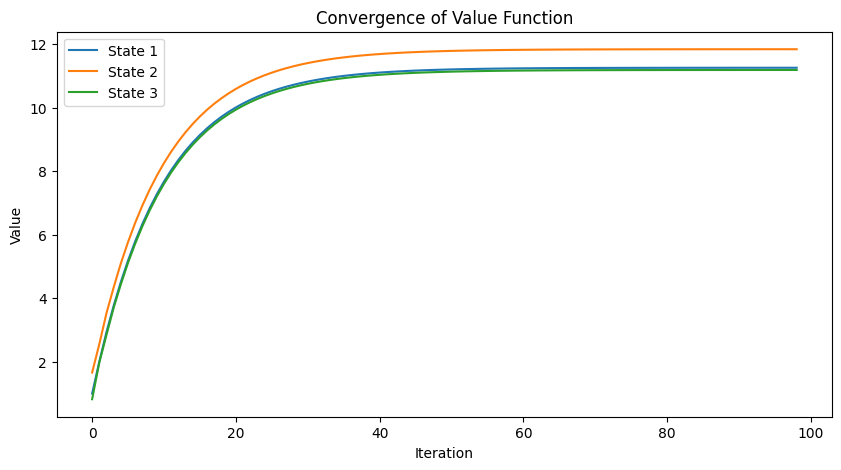

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrices
T_a0 = np.array([[0.5, 0.5, 0], [0.5, 0.5, 0], [0.5, 0.5, 0]])
T_a1 = np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]])

# Reward matrices
R_a0 = np.array([[1, 1, 0], [2, 0, 0], [1, 1, 0]])
R_a1 = np.array([[0, 0, 1], [0, 0, 2], [0, 0, -1]])

# Discount factor
gamma = 0.9

# Initialize policy randomly but uniformly for each action
policy = np.full((3, 2), 0.5)

# Max number of iterations for modified policy evaluation
max_iter = 100

def calculate_value_function(policy):
    # Initialize value function
    V = np.zeros(3)
    V_over_time = np.zeros((3, max_iter))
    for i in range(max_iter):
        old_V = np.copy(V)
        for state in range(3):
            # Compute value function for each action separately
            action_values = np.zeros(2)
            for a in range(2):
                for s in range(3):
                    if a == 0:
                        action_values[a] += T_a0[state][s] * (R_a0[state][s] + gamma * old_V[s])
                    else:
                        action_values[a] += T_a1[state][s] * (R_a1[state][s] + gamma * old_V[s])
            # Calculate value function for the state
            V[state] = np.dot(policy[state], action_values)
            V_over_time[state, i] = V[state]
        if np.max(np.abs(old_V - V)) < 1e-5:
            break
    return V, V_over_time[:, :i]

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def policy_improvement():
    policy = np.full((3, 2), 0.5)  # Initialize policy
    while True:
        old_policy = np.copy(policy)
        V, _ = calculate_value_function(policy)
        for state in range(3):
            action_values = np.zeros(2)
            action_values[0] = sum([T_a0[state][s] * (R_a0[state][s] + gamma * V[s]) for s in range(3)])
            action_values[1] = sum([T_a1[state][s] * (R_a1[state][s] + gamma * V[s]) for s in range(3)])
            policy[state] = softmax(action_values)
        if np.allclose(old_policy, policy):
            break
    return policy

print("Initial Policy:", policy)
optimal_policy = policy_improvement()
print("Optimal Policy:", optimal_policy)

# Plot the convergence of the value function for each state
_, V_over_time = calculate_value_function(optimal_policy)

plt.figure(figsize=(10, 5))
for state in range(3):
    plt.plot(V_over_time[state], label=f'State {state + 1}')
plt.title('Convergence of Value Function')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()


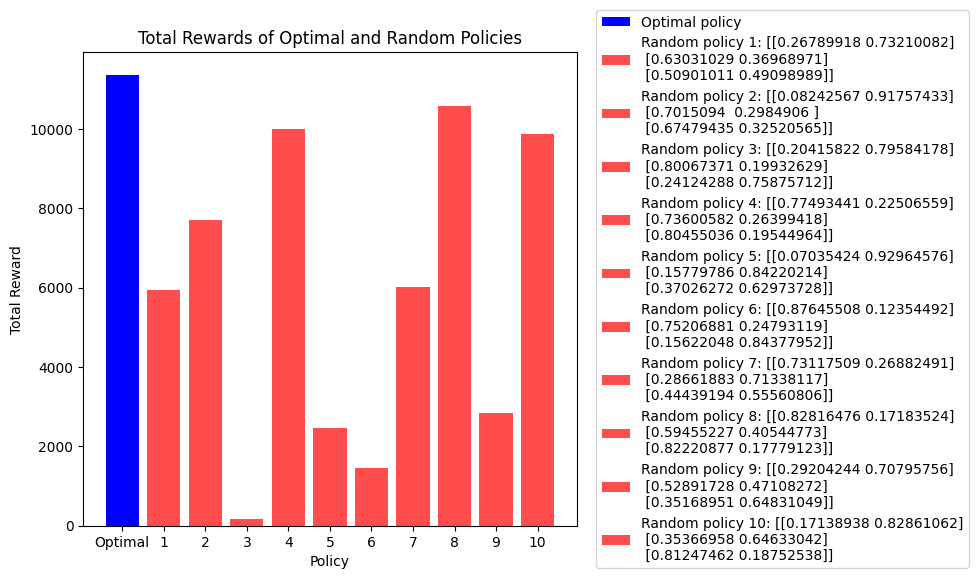

In [42]:
def simulate_stochastic(policy, num_episodes=100, max_steps=100):
    total_rewards = 0
    for _ in range(num_episodes):
        state = np.random.choice([0, 1, 2])  # Start with a random state
        for _ in range(max_steps):
            # Select action based on policy probabilities
            action = np.random.choice([0, 1], p=policy[state])

            if action == 0:
                next_state = np.random.choice([0, 1, 2], p=T_a0[state])
                reward = R_a0[state][next_state]
            else:  # action == 1
                next_state = np.random.choice([0, 1, 2], p=T_a1[state])
                reward = R_a1[state][next_state]

            total_rewards += reward
            state = next_state
    return total_rewards

num_policies = 10

# Simulate the optimal policy
optimal_reward = simulate_stochastic(optimal_policy)

# Generate and simulate random policies
random_rewards = []
labels = []
for i in range(num_policies):
    random_policy = np.random.dirichlet(np.ones(2), size=3)
    labels.append(str(random_policy))
    random_reward = simulate_stochastic(random_policy)
    random_rewards.append(random_reward)

# Plotting
plt.figure(figsize=(10, 6))

# Plot optimal policy reward
plt.bar(0, optimal_reward, color='b', label='Optimal policy')

# Plot random policy rewards with individual labels
for i, random_reward in enumerate(random_rewards):
    plt.bar(i + 1, random_reward, color='r', alpha=0.7, label=f'Random policy {i+1}: {labels[i]}')

plt.xlabel('Policy')
plt.ylabel('Total Reward')
plt.title('Total Rewards of Optimal and Random Policies')
plt.xticks(range(num_policies + 1), ['Optimal'] + [f'{i+1}' for i in range(num_policies)])
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)  # Place legend outside plot for clarity
plt.tight_layout()
plt.show()